# Assignment 3: Finding The Minimal Energy Configuration Of Charge Particle Within A Circle


_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

In [399]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from typing import List, Tuple
from itertools import product, combinations
import matplotlib.patches as patches

Energy of between two patricles is given by:

$E_{i,j}=\dfrac{1}{|_{i,j}|}$


Force on 2 particles:


$\vec F_{i,j}=\frac{\vec r_{i,j}}{|r_{i,j}|^3}$


Source: Assignment 3 description

In [400]:
def get_force_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the electrostatic force between two particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: The vector representing the force exerted on the first particle by the second.
    """

    p_i, p_j = np.array(p_i), np.array(p_j)
    r_i_j = p_i - p_j
    dist_i_j = np.linalg.norm(r_i_j)
    
    # Avoid division by zero by imposing a minimum distance
    min_dist = 1e-10  # A small number to prevent division by zero
    dist_i_j = max(dist_i_j, min_dist)
    
    # Calculate the force vector using Coulomb's Law
    Force_i_j = coulomb_constant * r_i_j / (dist_i_j**2)

    return Force_i_j


def get_energy_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the potential energy between two particles based on Coulomb's Law.

    The potential energy is inversely proportional to the distance between the particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        float: The scalar value of the potential energy between the two particles.
    """

    # Convert positions to numpy arrays for vectorized operations
    p_i, p_j = np.array(p_i), np.array(p_j)

    # Compute the Euclidean distance between particles
    dist_i_j = np.linalg.norm(p_i - p_j)

    # Calculate the potential energy using Coulomb's Law
    Energy_i_j = coulomb_constant / dist_i_j

    return Energy_i_j


The electrostatic potential energy $U_{\mathrm{E}}$ stored in a system of $N$ charges $q_1, q_2, \ldots, q_N$ at positions $\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N$ respectively, is:
$$
U_{\mathrm{E}}=\frac{1}{2} \sum_{i=1}^N q_i \Phi\left(\mathbf{r}i\right)=\frac{1}{2} k_e \sum{i=1}^N q_i \sum_{\substack{j=1 \\ j \neq i}}^N \frac{q_j}{r_{i j}}
$$


we assume $q{i} = q_{j} ... = q_{n}$

In [401]:

def get_energy_all_particles(list_of_particles):
    """
    Calculate the total potential energy of a system of particles.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        float: The total potential energy of the system.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize list to store energies
    energies = []

    # Calculate energy between each unique pair of particles
    for p_i, p_j in combinations(list_of_particles, 2):
        energy_of_combi = get_energy_2_particles(p_i, p_j)
        energies.append(energy_of_combi)
    
    # Convert list of energies to numpy array and sum them to get total energy
    total_energy = np.sum(np.array(energies))

    return total_energy

def get_total_force_on_each_particle(list_of_particles, coulomb_constant=1):
    """
    Calculate the net force on each particle in a system.

    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: An n x 2 matrix representing the net force vectors on each of the n particles.
    """
    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize an array to store the net force on each particle
    net_forces = np.zeros_like(list_of_particles)  # Assuming 2D particles

    # Calculate net force on each particle
    for i, p_i in enumerate(list_of_particles):
        for j, p_j in enumerate(list_of_particles):
            if i != j:
                # Calculate force exerted on p_i by p_j
                force_ij = get_force_2_particles(p_i, p_j, coulomb_constant)
                net_forces[i] += force_ij

    return net_forces

In [402]:
p_i = (0,1)
p_j = (1,2)
force = get_force_2_particles(p_i,p_j)
print('force', force)

force [-0.5 -0.5]


In [403]:
def in_circle(position, radius):
    """Check if a position is within a circle of given radius centered at the origin."""
    position = np.array(position)
    x, y = position.T  # Transpose to separate x and y values
    return (x**2 + y**2) <= radius**2

In [404]:
def randomly_generate_initial_positions(n_particles, radius):
    positions = []
    while len(positions) < n_particles:
        x, y = np.random.uniform(-radius*2, radius*2, size=2)
        position = x,y
        if in_circle(position, radius):
            positions.append([x, y])
    return np.array(positions)

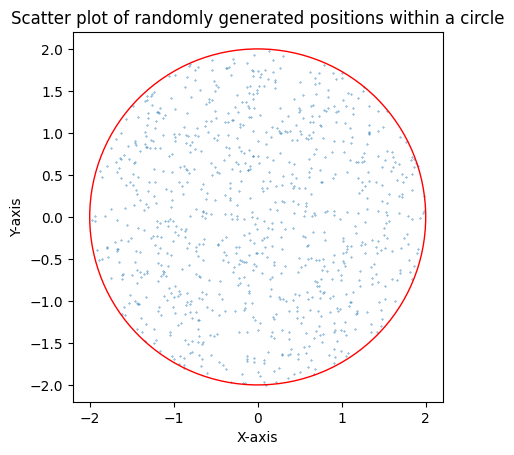

In [405]:
test_data = randomly_generate_initial_positions(900, 2)
x_coordinates = test_data[:, 0]  # Extract all x-coordinates
y_coordinates = test_data[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=0.1)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of randomly generated positions within a circle')

# Show the plot
plt.show()

In [406]:
def random_change_position_particles(particles, radius, movement_scaler=0.1):
    """Randomly increments x and y of each particle in a list."""
    updated_positions = []
    for particle in particles:
        delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius  # Use shape (2,) for delta_pos
        new_position = particle + delta_pos
        while not in_circle(new_position, radius):
            delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
            new_position = particle + delta_pos
        updated_positions.append(new_position)
    return np.array(updated_positions)

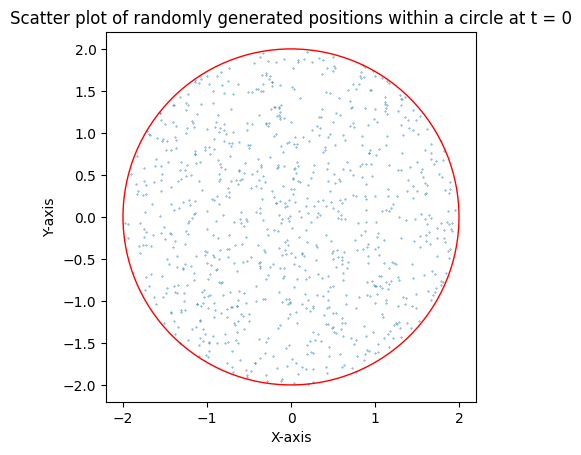

position particle 1 [-1.14234467  0.75105394]
Total System Energy 344006.3382915123
Total System Forcse [[-193.69444659  334.00513259]
 [  36.41440875 -356.28281366]
 [ 338.85029076  106.96931599]
 ...
 [  51.40446708   23.92481025]
 [-164.38605317 -298.38557321]
 [ 299.70358766    6.90780972]]


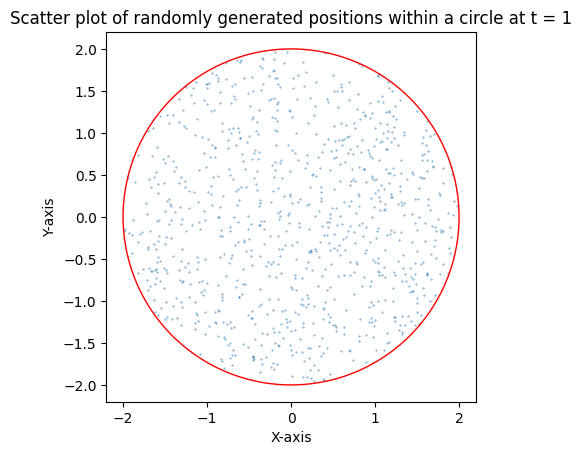

position particle 1 [-0.21379139 -1.11015483]
Total System Energy 346582.08461363136
Total System Forcse [[ -87.24422038 -215.11795057]
 [-354.81045754  -51.47409763]
 [ 135.47303553  -96.11977739]
 ...
 [-404.76551632  125.45550828]
 [ -40.27046788  432.93156249]
 [-263.66233861 -278.60128409]]


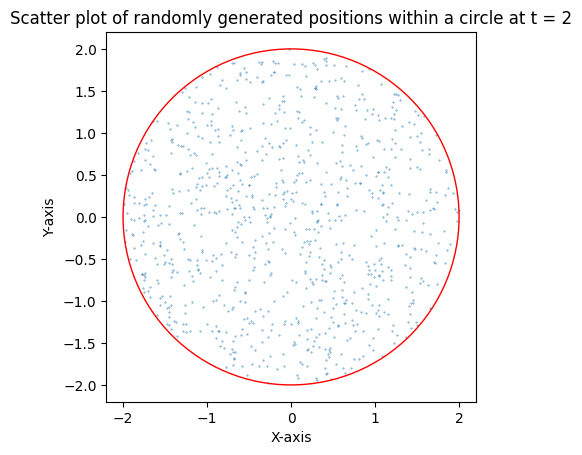

position particle 1 [ 0.49662469 -1.08506539]
Total System Energy 347554.21976668696
Total System Forcse [[ 102.64243582 -253.45259055]
 [ 282.6303076   218.66991065]
 [ -61.6923834  -206.39989281]
 ...
 [ 360.33793305 -156.93196084]
 [ 161.23801216 -151.00882734]
 [ 318.45629559  297.76384421]]


In [407]:
test_data = randomly_generate_initial_positions(900, 2)
radius = 2
timesteps = 3
movement_scaler = 2
for t in range(timesteps):
    x_coordinates = test_data[:, 0]  # Extract all x-coordinates
    y_coordinates = test_data[:, 1]  # Extract all y-coordinates

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Scatter plot
    ax.scatter(x_coordinates, y_coordinates, s=0.1)

    # Create a circle patch with the same radius as used for the position generation
    circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
    ax.add_patch(circle)

    # Set aspect of the plot to be equal, so the circle isn't skewed
    ax.set_aspect('equal', adjustable='box')

    # Setting labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Scatter plot of randomly generated positions within a circle at t = {t}')

    # Show the plot
    plt.show()
    print('position particle 1', test_data[0])
    print('Total System Energy', get_energy_all_particles(test_data))
    print('Total System Forcse', get_total_force_on_each_particle(test_data))
    test_data = random_change_position_particles(particles=test_data, radius=radius, movement_scaler=movement_scaler)

In [408]:
def logarithmic_decay_cooling(T_init, t, a, b):
    """https://canvas.uva.nl/courses/39303/pages/lecture-09-the-gibbs-sampler-and-simulated-annealing?module_item_id=1830823 slide 14"""
    T_n = a/(np.log(t+b))
    return T_n



def exponential_decay_cooling(T_init, t, a, b):
    return T_init * (a ** t)


In [409]:
T_init = 100

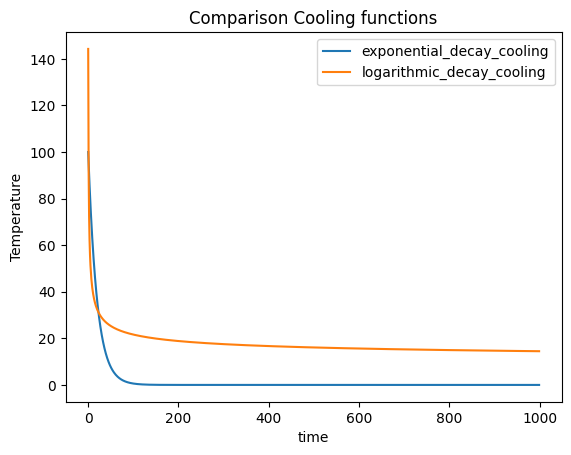

In [410]:
T_init = 100
temperatures_exp = [exponential_decay_cooling(T_init,t, a=0.95,b=4) for t in range(1000)]
temperatures_log = [logarithmic_decay_cooling(T_init,t, a=100,b=2) for t in range(1000)]

plt.title('Comparison Cooling functions')
plt.plot(temperatures_exp, label = 'exponential_decay_cooling')
plt.plot(temperatures_log, label = 'logarithmic_decay_cooling')
plt.legend()
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

In [411]:
def Simulated_Anealing_change_position_particles(particles, time_range, radius, movement_scaler=0.1, T_init=1, cooling_function=None, a=100  , b=1):
    """
    Perform simulated annealing to update particle positions within a specified radius.

    This function moves each particle randomly within a circle of given radius, and evaluates the total energy of the system. 
    If the total energy decreases, the new position is accepted. If not, the new position may still be accepted 
    with a probability dependent on the current temperature. The temperature decreases over time using a cooling function.

    Parameters:
    - particles (list): Initial positions of particles.
    - time_range (int): Number of iterations for the annealing process.
    - radius (float): Radius within which particles can move.
    - movement_scaler (float, optional): Scales the magnitude of particle movements. Default is 0.1.
    - T_init (float, optional): Initial temperature for annealing. Default is 1.
    - cooling_function (callable, optional): Function to reduce temperature over time. Must be provided.
    - a, b (int, optional): Parameters for the cooling function. Default values are 10 and 2.

    Returns:
    - updated_positions (list): Final positions of particles after annealing.
    - Total_Energy_over_time (numpy array): Total system energy at each timestep.
    """
    # Check if the cooling function is provided, raise error if not
    if cooling_function is None:
        raise ValueError("cooling_function must be provided")

    # Initialize temperature and particle positions
    T = T_init
    particles = np.array(particles)
    updated_positions = particles.copy()
    test_positions = particles.copy()

    # Calculate initial total energy of the system
    Total_energy_old = get_energy_all_particles(particles)
    Total_Energy_over_time = np.zeros(time_range)

    # Iterate over the given time range
    for t in range(time_range):
        # Update positions of each particle
        for index, particle in enumerate(particles):
            # Generate a new position for the particle
            delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
            new_position = particle + delta_pos

            # Ensure the new position is within the specified circle
            while not in_circle(new_position, radius):
                delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
                new_position = particle + delta_pos
            # print('past circle')
            test_positions[index] = new_position
            Total_energy_new = get_energy_all_particles(test_positions)

            # Accept the new position if energy is reduced, else accept it probabilistically
            if Total_energy_old > Total_energy_new:
                updated_positions[index] = new_position
                Total_energy_old = get_energy_all_particles(updated_positions)
            else:
                alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / T), 1])
                if np.random.uniform() <= alpha:
                    updated_positions[index] = new_position
                    Total_energy_old = get_energy_all_particles(updated_positions)
                else:
                    updated_positions[index] = particles[index]

            Total_Energy_over_time[t] = get_energy_all_particles(updated_positions)

        # Update the temperature using the cooling function
        T = cooling_function(T_init, t, a, b)
        print('timestep', t)
    # Return the updated positions and energy over time
    return updated_positions, Total_Energy_over_time


In [412]:
test_data = randomly_generate_initial_positions(40, 2)

In [413]:
test_data

array([[ 9.40625252e-01,  1.02368587e+00],
       [-1.81412447e+00, -5.04583683e-01],
       [-7.37436321e-01,  4.21119245e-01],
       [-1.38698322e+00, -2.33501168e-02],
       [ 3.86154615e-01, -1.28869281e+00],
       [-1.01249781e+00, -1.20233262e+00],
       [ 9.68122921e-01,  8.09065874e-01],
       [-8.36337083e-01, -6.17385872e-01],
       [ 9.35123823e-01,  8.51192028e-01],
       [-6.87802760e-01,  6.42398701e-01],
       [-3.13866090e-04,  1.20672846e+00],
       [-7.14734154e-01, -1.24228399e+00],
       [ 2.12400236e-01, -1.01376719e+00],
       [ 1.27482446e+00, -6.89315920e-01],
       [ 1.20507552e+00, -1.15972184e+00],
       [-1.61266265e+00,  6.86938281e-01],
       [ 2.23514360e-01, -3.94385521e-01],
       [-1.91497402e+00, -1.99787113e-01],
       [-2.82477407e-02,  9.96584167e-02],
       [ 1.52818680e+00, -1.38824608e-01],
       [-1.13486259e+00, -3.37089752e-01],
       [ 1.68573539e+00, -5.87435747e-01],
       [-5.15764698e-01, -5.64848372e-01],
       [-1.

In [414]:
# params

test_data = randomly_generate_initial_positions(20, 2)
radius = 10
movement_scaler = 0.2

In [415]:
test_data = randomly_generate_initial_positions(20, 2)
run_postions_result, energy_over_time_data = Simulated_Anealing_change_position_particles(particles=test_data, radius=radius, movement_scaler=movement_scaler, time_range=500,cooling_function=exponential_decay_cooling, a=0.95,b=7)

timestep

 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
timestep 8

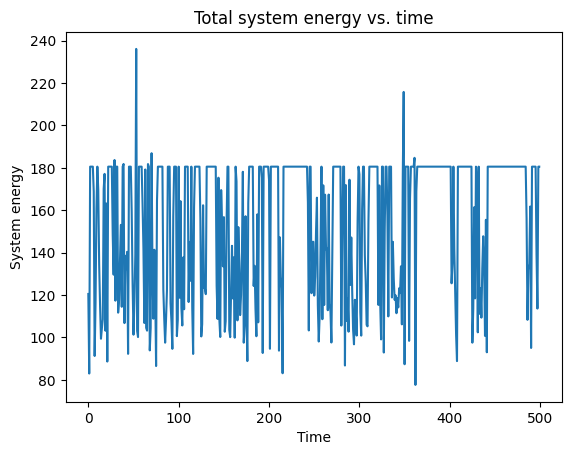

In [416]:
plt.plot(energy_over_time_data)
plt.title('Total system energy vs. time')
plt.xlabel('Time')
plt.ylabel('System energy')
plt.show()

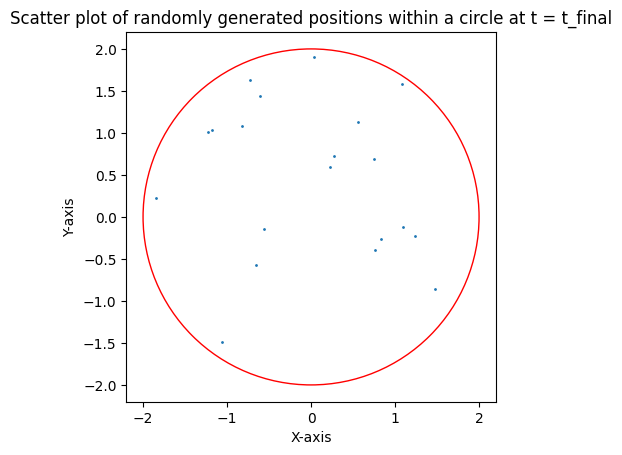

Total System Energy 180.55198077306997
Total System Forces [[  2.13526524  -0.92467431]
 [  7.69074653   1.16586861]
 [ -7.95023864  -2.21990578]
 [  6.88890312  -7.56973869]
 [-26.87248943  -5.4387233 ]
 [ -3.65542025  -7.2034219 ]
 [  4.17901587   6.95315057]
 [  1.55685883   9.02788351]
 [ 13.66920284  -5.19410505]
 [ -3.45996092 -12.27377716]
 [  8.15788667   7.47421383]
 [ -3.63200507  -7.0297298 ]
 [  2.01383935   6.78904005]
 [  5.42320491   2.70786274]
 [  0.63110521   4.22716212]
 [ -3.25005782  -3.01380442]
 [ -1.80033209   0.54380796]
 [ -5.24797646  11.88650001]
 [ -3.37094681  -6.58708996]
 [  6.89339891   6.67948095]]


In [418]:
x_coordinates = run_postions_result[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=1)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot of randomly generated positions within a circle at t = t_final')

# Show the plot
plt.show()
print('Total System Energy', get_energy_all_particles(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))